# Analysis of 2HDM and 3HDM models

In this notebook, we explore the parameter space of the QED-DFSZ model, and more generic 3HDM presented in <a href="#AlpacaPheno">[0]</a>.

In [1]:
from alpaca import ALPcouplings
import numpy as np
import matplotlib.pyplot as plt

from alpaca.statistics.chisquared import get_chi2
from alpaca.statistics.functions import nsigmas
from alpaca.plotting.mpl import exclusionplot
from alpaca.sectors import default_sectors

plt.rcParams.update({'font.size': 16, 'text.usetex': True, 'font.family': 'serif', 'font.serif': 'Computer Modern Roman'})

In [107]:
from alpaca.uvmodels import QED_DFSZ

tanbeta = np.logspace(-1, 1, 100)
fa= np.logspace(5, 8, 100)
FA, TANBETA = np.meshgrid(fa, tanbeta)

Fa_flat = FA.flatten()
Tanbeta_flat = TANBETA.flatten()
couplings = []

for i, j in zip(Fa_flat, Tanbeta_flat):
    couplings.append(QED_DFSZ.get_couplings({'beta': np.arctan(j)}, i).match_run(5.5, 'VA_below', 'leadinglog', matching_scale=80))

couplings_QEDDFSZ = np.array(couplings).reshape(FA.shape)

magrid_QEDDFSZ=np.full(FA.shape, 2)
ma2grid_QEDDFSZ=np.full(FA.shape, 0.2)


In [ ]:
vEW=246
def charges_3HDM(m, n, vd, vu):
    Xu=(m*vd**2-n*(vd**2-vEW**2+vu**2))/vEW**2
    Xd=((m-n)*(vd**2-vEW**2)-n*vu**2)/vEW**2
    Xe=(m*vd**2-n*(vd**2+vu**2))/vEW**2
    cG=-m
    cB=m+3*n
    return Xu, Xd, Xe, cG, cB

#Scan of points
vu=np.logspace(np.log10(19.35),np.log10(246),100)
vd=np.logspace(np.log10(0.47266),np.log10(246),100)

VU, VD=np.meshgrid(vu, vd)

#Calculate the charges
Xu, Xd, Xe, cG, cB = charges_3HDM(-2,1, VD, VU)

Xu_flatte= Xu.flatten()
Xd_flatte= Xd.flatten()
Xe_flatte= Xe.flatten()

Xu2, Xd2, Xe2, cG2, cB2 = charges_3HDM(2,1, VD, VU)

Xu2_flatte= Xu2.flatten()
Xd2_flatte= Xd2.flatten()
Xe2_flatte= Xe2.flatten()
# Create a list to store the ALPcouplings objects
couplings_list1 = []
couplings_list2 = []
couplings_list3 = []
couplings_list4 = []

ma_val1=0.2
ma_val2=2
fa_val1=5e6
fa_val2=1e6



In [ ]:
for i, j, k, i2, j2, k2 in zip(Xu_flatte, Xd_flatte, Xe_flatte, Xu2_flatte, Xd2_flatte, Xe2_flatte):
    couplings1 = ALPcouplings({'cuR': i, 'cdR': j, 'ceR': k, 'cG':cG,'cB':cB}, scale=fa_val1, basis='derivative_above')
    couplings_list1.append(couplings1.match_run(ma_val1, 'VA_below', 'leadinglog'))
    couplings2 = ALPcouplings({'cuR': i, 'cdR': j, 'ceR': k, 'cG':cG,'cB':cB}, scale=fa_val2, basis='derivative_above')
    couplings_list2.append(couplings2.match_run(ma_val2, 'VA_below', 'leadinglog'))
    couplings3= ALPcouplings({'cuR': i2, 'cdR': j2, 'ceR': k2, 'cG':cG2,'cB':cB2}, scale=fa_val1, basis='derivative_above')
    couplings_list3.append(couplings3.match_run(ma_val1, 'VA_below', 'leadinglog'))
    couplings4= ALPcouplings({'cuR': i2, 'cdR': j2, 'ceR': k2, 'cG':cG2,'cB':cB2}, scale=fa_val2, basis='derivative_above')
    couplings_list4.append(couplings4.match_run(ma_val2, 'VA_below', 'leadinglog'))
    


In [110]:
# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_3HDM1= np.array(couplings_list1).reshape(Xu.shape)
couplings_3HDM2 = np.array(couplings_list2).reshape(Xu.shape)
couplings_3HDM3 = np.array(couplings_list3).reshape(Xu2.shape)
couplings_3HDM4 = np.array(couplings_list4).reshape(Xu2.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid_3HDM1 = np.full(Xu.shape, fa_val1)
ma_grid_3HDM1 = np.full(Xu.shape, ma_val1)

ma_grid_3HDM2 = np.full(Xu.shape, ma_val2)
fa_grid_3HDM2 = np.full(Xu.shape, fa_val2)

ma_grid_3HDM3 = np.full(Xu2.shape, ma_val1)
fa_grid_3HDM3 = np.full(Xu2.shape, fa_val1)

ma_grid_3HDM4 = np.full(Xu2.shape, ma_val2)
fa_grid_3HDM4 = np.full(Xu2.shape, fa_val2)


In [111]:
chi2_belle3HDM1 = get_chi2(default_sectors['all'], ma_grid_3HDM1, couplings_3HDM1, fa_grid_3HDM1, integrator='no_rge', min_probability=0)
chi2_belle3HDM2 = get_chi2(default_sectors['all'], ma_grid_3HDM2, couplings_3HDM2, fa_grid_3HDM2, integrator='no_rge', min_probability=0)
chi2_belle3HDM3 = get_chi2(default_sectors['all'], ma_grid_3HDM3, couplings_3HDM3, fa_grid_3HDM3, integrator='no_rge', min_probability=0)
chi2_belle3HDM4 = get_chi2(default_sectors['all'], ma_grid_3HDM4, couplings_3HDM4, fa_grid_3HDM4, integrator='no_rge', min_probability=0)

In [112]:
chi2_QEDDFSZ = get_chi2(default_sectors['all'], magrid_QEDDFSZ, couplings_QEDDFSZ, FA, integrator='no_rge', min_probability=0)

In [113]:
chi2_QEDDFSZ2 = get_chi2(default_sectors['all'], ma2grid_QEDDFSZ, couplings_QEDDFSZ, FA, integrator='no_rge', min_probability=0)

In [114]:
from alpaca.statistics.chisquared import ChiSquaredList
chi2_meas_QEDDFSZ=chi2_QEDDFSZ[0].split_measurements()
chi2_meas_QEDDFSZ2=chi2_QEDDFSZ2[0].split_measurements()

chi2_meas_QEDDFSZ = ChiSquaredList([c for c in chi2_meas_QEDDFSZ if c.sector.name != 'K+ -> alp pion+ @ NA62' and c.sector.name !='epsK @ PDG' ])
for c in chi2_meas_QEDDFSZ:
    if c.sector.name == 'K+ -> alp pion+ @ NA62(2022)':
        c.set_plot_style(color="#821e99",lw=2)
    if c.sector.name == 'K+ -> alp pion+ @ E949':
        c.set_plot_style(color="#993b1e",lw=2)
    if c.sector.name == 'B0 -> K*0 muon muon @ LHCb':
        c.set_plot_style(color="#3650c4",lw=2)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=2)
    elif c.sector.name == 'K+ -> electron electron pion+ @ MicroBooNE':
        c.set_plot_style(color="#c6f312",lw=2)
    elif c.sector.name == 'B0 -> K*0 muon muon @ Belle II':
        c.set_plot_style(color="#08e0d9",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ Belle II':
        c.set_plot_style(color="#e74c3c",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ LHCb':
        c.set_plot_style(color="#e73cd9ff",lw=2)
    elif c.sector.name == 'B+ -> muon muon pion+ @ Belle':
        c.set_plot_style(color="#f1c40f",lw=2)
    elif c.sector.name == 'B+ -> muon muon pion+ @ BaBar':
        c.set_plot_style(color="#26f10f",lw=2)
    elif c.sector.name == 'B0 -> muon muon pion0 @ BaBar':
        c.set_plot_style(color="#fb83e3",lw=2)
chi2_meas_QEDDFSZ2 = ChiSquaredList([c for c in chi2_meas_QEDDFSZ2 if c.sector.name != 'K+ -> alp pion+ @ NA62' and c.sector.name !='epsK @ PDG' and 'BaBar' not in c.sector.name])
for c in chi2_meas_QEDDFSZ2:
    if c.sector.name == 'K+ -> alp pion+ @ NA62(2022)':
        c.set_plot_style(color="#821e99",lw=2)
    elif c.sector.name == 'K+ -> alp pion+ @ E949':
        c.set_plot_style(color="#993b1e",lw=2)
    elif c.sector.name == 'B0 -> K*0 muon muon @ LHCb':
        c.set_plot_style(color="#3650c4",lw=2)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=2)
    elif c.sector.name == 'K+ -> electron electron pion+ @ MicroBooNE':
        c.set_plot_style(color="#c6f312",lw=2)
    elif c.sector.name == 'B0 -> K*0 muon muon @ Belle II':
        c.set_plot_style(color="#08e0d9",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ Belle II':
        c.set_plot_style(color="#e74c3c",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ LHCb':
        c.set_plot_style(color="#e73cd9ff",lw=2)
    elif c.sector.name == 'B+ -> muon muon pion+ @ Belle':
        c.set_plot_style(color="#f1c40f",lw=2)
    elif c.sector.name == 'B+ -> muon muon pion+ @ BaBar':
        c.set_plot_style(color="#26f10f",lw=2)
    elif c.sector.name == 'B0 -> muon muon pion0 @ BaBar':
        c.set_plot_style(color="#fb83e3",lw=2)

chi2_meas_3HDM1=chi2_belle3HDM1[0].split_measurements()
chi2_meas_3HDM2=chi2_belle3HDM2[0].split_measurements()
chi2_meas_3HDM3=chi2_belle3HDM3[0].split_measurements()
chi2_meas_3HDM4=chi2_belle3HDM4[0].split_measurements()

chi2_meas_3HDM1 = ChiSquaredList([c for c in chi2_meas_3HDM1 if c.sector.name != 'K+ -> alp pion+ @ NA62' and c.sector.name !='epsK @ PDG' ])
for c in chi2_meas_3HDM1:
    if c.sector.name == 'K+ -> alp pion+ @ NA62(2022)':
        c.set_plot_style(color="#821e99",lw=2)
    if c.sector.name == 'B0 -> K*0 muon muon @ LHCb':
        c.set_plot_style(color="#3650c4",lw=2)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=2)
    elif c.sector.name == 'K+ -> electron electron pion+ @ MicroBooNE':
        c.set_plot_style(color="#c6f312",lw=2)
    elif c.sector.name == 'B0 -> K*0 muon muon @ Belle II':
        c.set_plot_style(color="#08e0d9",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ Belle II':
        c.set_plot_style(color="#e74c3c",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ LHCb':
        c.set_plot_style(color="#e73cd9ff",lw=2)


chi2_meas_3HDM2 =  ChiSquaredList([c for c in chi2_meas_3HDM2 if c.sector.name != 'K+ -> alp pion+ @ NA62' and c.sector.name !='epsK @ PDG' ])
for c in chi2_meas_3HDM2:
    if c.sector.name == 'K+ -> alp pion+ @ NA62(2022)':
        c.set_plot_style(color="#821e99",lw=2)
    if c.sector.name == 'B0 -> K*0 muon muon @ LHCb':
        c.set_plot_style(color="#3650c4",lw=2)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=2)
    elif c.sector.name == 'K+ -> electron electron pion+ @ MicroBooNE':
        c.set_plot_style(color="#c6f312",lw=2)
    elif c.sector.name == 'B0 -> K*0 muon muon @ Belle II':
        c.set_plot_style(color="#08e0d9",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ Belle II':
        c.set_plot_style(color="#e74c3c",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ LHCb':
        c.set_plot_style(color="#e73cd9ff",lw=2)
        
chi2_meas_3HDM3 =  ChiSquaredList([c for c in chi2_meas_3HDM3 if c.sector.name != 'K+ -> alp pion+ @ NA62' and c.sector.name != 'epsK @ PDG' ])
for c in chi2_meas_3HDM3:
    if c.sector.name == 'K+ -> alp pion+ @ NA62(2022)':
        c.set_plot_style(color="#821e99",lw=2)
    if c.sector.name == 'B0 -> K*0 muon muon @ LHCb':
        c.set_plot_style(color="#3650c4",lw=2)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=2)
    elif c.sector.name == 'K+ -> electron electron pion+ @ MicroBooNE':
        c.set_plot_style(color="#c6f312",lw=2)
    elif c.sector.name == 'B0 -> K*0 muon muon @ Belle II':
        c.set_plot_style(color="#08e0d9",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ Belle II':
        c.set_plot_style(color="#e74c3c",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ LHCb':
        c.set_plot_style(color="#e73cd9ff",lw=2)

chi2_meas_3HDM4 = ChiSquaredList([c for c in chi2_meas_3HDM4 if c.sector.name != 'K+ -> alp pion+ @ NA62' and c.sector.name != 'epsK @ PDG' ])
for c in chi2_meas_3HDM4:
    if c.sector.name == 'K+ -> alp pion+ @ NA62 (2022)':
        c.set_plot_style(color="#821e99",lw=2)
    if c.sector.name == 'B0 -> K*0 muon muon @ LHCb':
        c.set_plot_style(color="#3650c4",lw=2)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=2)
    elif c.sector.name == 'K+ -> electron electron pion+ @ MicroBooNE':
        c.set_plot_style(color="#c6f312",lw=2)
    elif c.sector.name == 'B0 -> K*0 muon muon @ Belle II':
        c.set_plot_style(color="#08e0d9",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ Belle II':
        c.set_plot_style(color="#e74c3c",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ LHCb':
        c.set_plot_style(color="#e73cd9ff",lw=2)
 # Fix the name for consistency

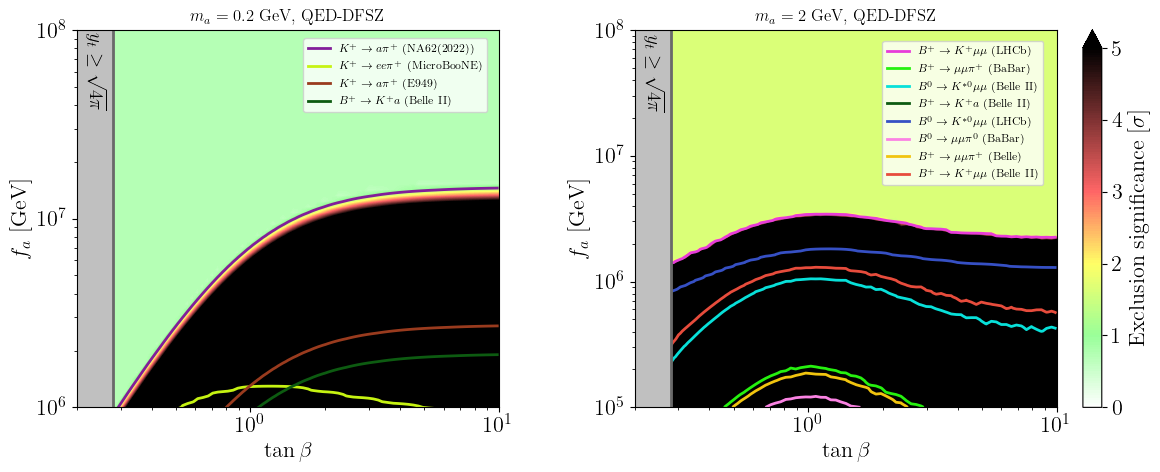

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=False)
ax1=exclusionplot(TANBETA, FA, chi2_meas_QEDDFSZ, r'$\tan\beta$', r'$ f_a$ [GeV]', rf'$m_a={ma_val2}$ GeV, QED-DFSZ', ax=ax[1])
ax2=exclusionplot(TANBETA, FA, chi2_meas_QEDDFSZ2, r'$\tan\beta$', r'$f_a$ [GeV]', rf'$m_a={ma_val1}$ GeV, QED-DFSZ', ax=ax[0])

ax1.get_legend().set_bbox_to_anchor((0.35, 0.78))
ax2.get_legend().set_bbox_to_anchor((0.3, 0.88))


ax1.fill_between([0.1, 0.28], 1e5, 1e8, color='silver', alpha=1, label=r'$y_t\geq \sqrt{4\pi}$', zorder=2)
ax2.fill_between([0.1, 0.28], 1e5, 1e8, color='silver', alpha=1, label=r'$y_t\geq \sqrt{4\pi}$', zorder=2)
ax1.vlines(0.28, 1e5, 1e8, color='dimgray', linewidth=2,zorder=2)
ax2.vlines(0.28, 1e5, 1e8, color='dimgray', linewidth=2,zorder=2)
ax1.set_xlim(0.2, 10)
ax2.set_xlim(0.2, 10)
ax1.set_ylim(1e5, 1e8)
ax2.set_ylim(1e6, 1e8)
ax1.text(0.24, 4.5e7, r'$y_t\geq \sqrt{4\pi}$', fontsize=14, color='black', rotation=-90, va='center', ha='center')
ax2.text(0.24, 6e7, r'$y_t\geq \sqrt{4\pi}$', fontsize=14, color='black', rotation=-90, va='center', ha='center')
# fig.axes[2].set_visible(False)
fig.axes[3].set_visible(False)

fig.tight_layout()
fig.tight_layout()
#fig.savefig('QED_DFSZ_exclusion2.pdf', bbox_inches='tight')

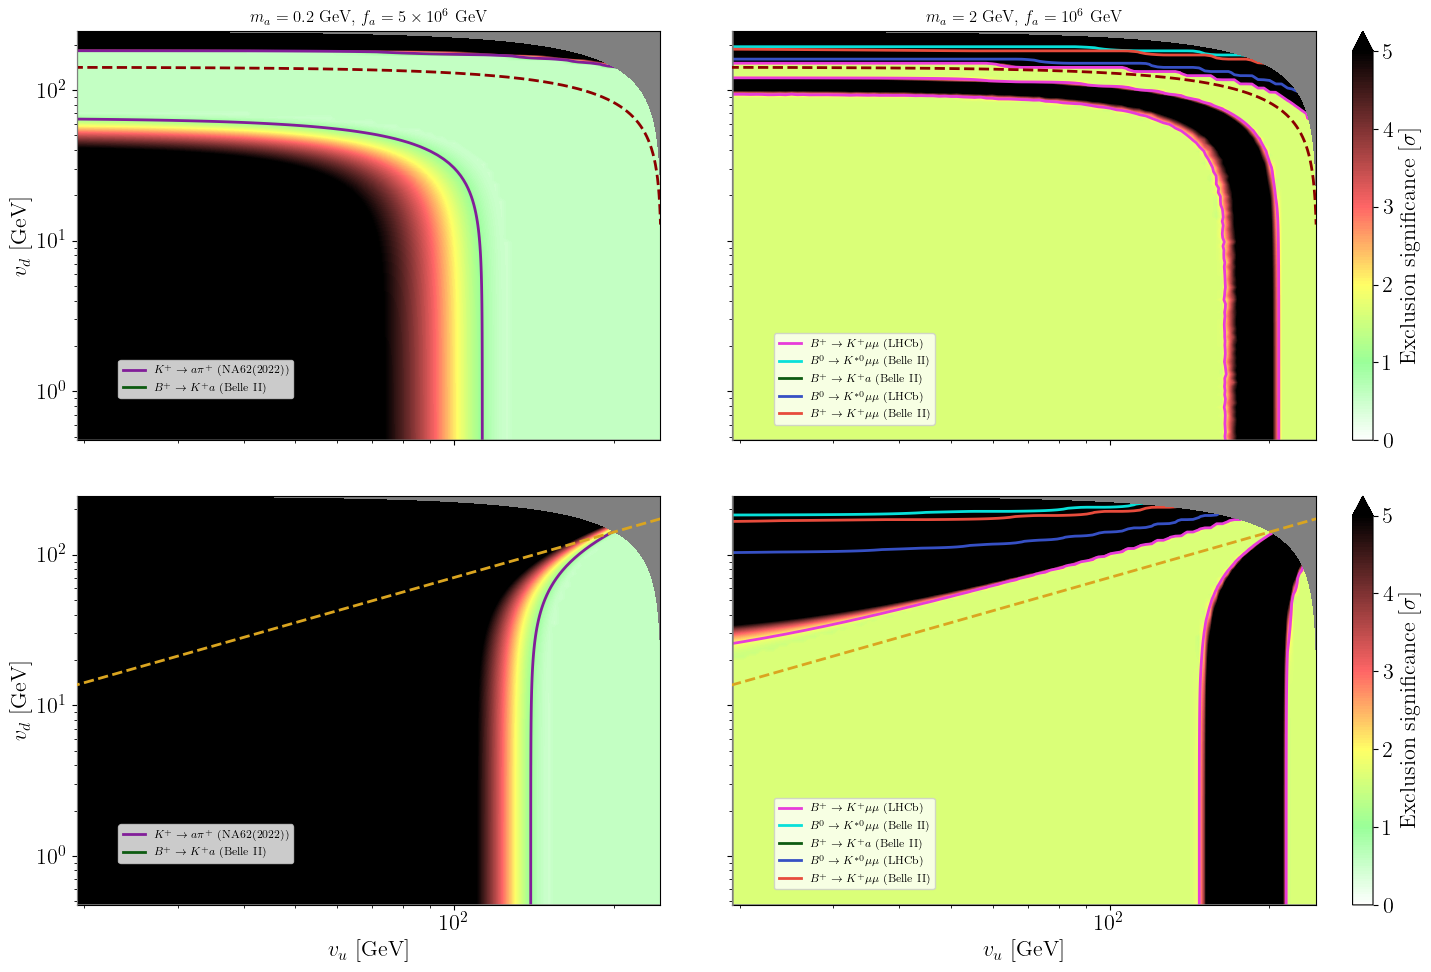

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True, sharey=True)

ax1=exclusionplot(vu, vd, chi2_meas_3HDM1, r' ', r'$v_d$ [GeV]', rf'$m_a=0.2$ GeV, $f_a=5\times 10^{6}$ GeV',    ax=ax[0, 0])
ax2=exclusionplot(vu, vd, chi2_meas_3HDM2, r' ', r' ', rf'$m_a=2$ GeV, $f_a= 10^{6}$ GeV', ax=ax[0, 1])
ax3=exclusionplot(vu, vd, chi2_meas_3HDM3, r'$v_u$ [GeV]', r'$v_d$ [GeV]', rf' ', ax=ax[1, 0])
ax4=exclusionplot(vu, vd, chi2_meas_3HDM4, r'$v_u$ [GeV]', r' ', rf' ', ax=ax[1, 1])
vu_aux=np.linspace(1, 245, 1000)
vd_aux=np.linspace(0.1, 246, 1000)
vu_aux_grid, vd_aux_grid = np.meshgrid(vu_aux, vd_aux)
for j in ax:
    for i in j:
        i.fill_between(vu_aux, 0.0,0.47266, color='gray', alpha=1, zorder=3)
        i.fill_betweenx(vd_aux, 0.1,19.35, color='gray', alpha=1, zorder=3)
        i.contourf(vu_aux_grid, vd_aux_grid, np.sqrt(vd_aux_grid**2 + vu_aux_grid**2), levels=[246,500], colors='gray', zorder=2)
        i.set_xlim(19.35,  245)
        i.set_ylim(0.47266, 245)

ax1.plot(vu_aux, np.sqrt((vEW**2-vu_aux**2)/(3)), color='darkred', linestyle='--', linewidth=2,label=r'$v_d=\sqrt{2(v_{EW}^2-v_u^2)/(1)}$', zorder=2)
ax2.plot(vu_aux, np.sqrt((vEW**2-vu_aux**2)/(3)), color='darkred', linestyle='--', linewidth=2, label=r'$v_d=\sqrt{2(v_{EW}^2-v_u^2)/(1)}$', zorder=3)

ax3.plot(vu_aux, vu_aux/np.sqrt(2), color='goldenrod', linestyle='--', linewidth=2, label=r'$v_d=v_u/3$', zorder=5)
ax4.plot(vu_aux, vu_aux/np.sqrt(2), color='goldenrod', linestyle='--', linewidth=2, label=r'$v_d=v_u/3$', zorder=5)


ax1.get_legend().set_bbox_to_anchor((-0.1, 0.15))
ax2.get_legend().set_bbox_to_anchor((-0.1, 0.15))
ax3.get_legend().set_bbox_to_anchor((-0.1, 0.15))
ax4.get_legend().set_bbox_to_anchor((-0.1, 0.15))

fig.axes[4].set_visible(False)
fig.axes[6].set_visible(False)
fig.tight_layout()

#fig.savefig('3HDM_exclusion2.pdf', bbox_inches='tight')

## References

<a id="AlpacaPheno">[0]</a>    
J. Alda, M. Fuentes Zamoro, L. Merlo, X. Ponce Diaz, S. Rigolin    
*Comprehensive ALP searches in Meson Decays*,    
In preparation.